<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.1 Modelos deterministas de primer orden </h3>
<h3 style="text-align: center;"> Ejercicios </h3>

### Ejercicio 1

Una presa perfectamente cúbica con una profundidad de 5.5 $m$ y una base de 100 $m^2$ recibe una entrada constante de líquido de 5  $m^3/hora$ y deja salir constantemente 3  $m^3/hora$. Dado que el nivel de agua inicial de la presa es de 4 $m$: 

**(a)** Indicar si la presa se desbordará y en qué momento. 

**(b)** Tras un análisis más detallado, se comprueba que la presa pierde líquido en función del nivel que alcance, estimándose en 1 $m^3$ por hora y metro de nivel. Indicar en este caso si la presa se desbordará y cuál será el nivel máximo alcanzado por la presa. 

**(c)** Resolver analíticamente el modelo y comprobar que la repuesta a las preguntas anteriores dadas por la simulación coincide con la analítica. 


**(a)** Indicar si la presa se desbordará y en qué momento. 

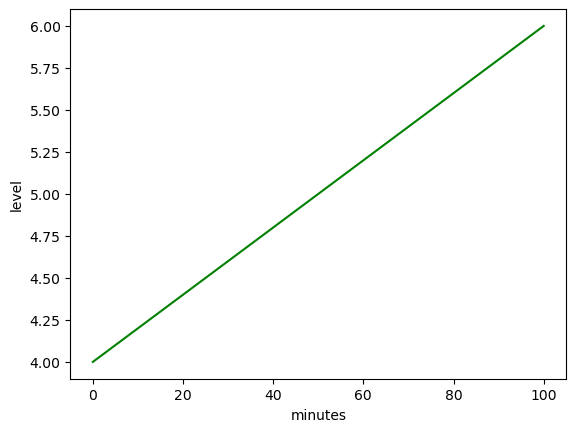

75


In [3]:
# LIBRERÍAS DE OPERACIONES
# ==============================================================================

import pandas as pd
import numpy as np

#from modsim import *

# LIBRERÍAS DE GRÁFICOS
# ==============================================================================
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

"""" definición del modelo"""

def fsys(x,t,fin,fout):
    dxdt=fin-fout
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=100
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
h0=4
S=100
x0=h0*S
fin = 5
fout=3
hmax=5.5

"""" dinámica del sistema"""

def solveODE_euler(f, x0, t,  arg=()):
    n = len(t)
    x = np.zeros(n)
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

x = solveODE_euler(fsys,x0,t,arg=(fin,fout))
h=x/S

"""" representación gráfica"""

plt.plot(h,"g-",label='Simulation')
plt.xlabel("minutes")
plt.ylabel("level")

plt.show()

"""" tiempo de desbordamiento"""

time_desb=np.min(np.where(h>=hmax))
print(time_desb)


Se observa entonces un crecimiento lineal del líquido en la presa, que se desborda a las 75 horas.  

**(b)** Tras un análisis más detallado, se comprueba que la presa pierde líquido en función del nivel que alcance, estimándose en 1 $m^3$ por hora y metro de nivel. Indicar en este caso si la presa se desbordará y cuál será el nivel máximo alcanzado por la presa. 

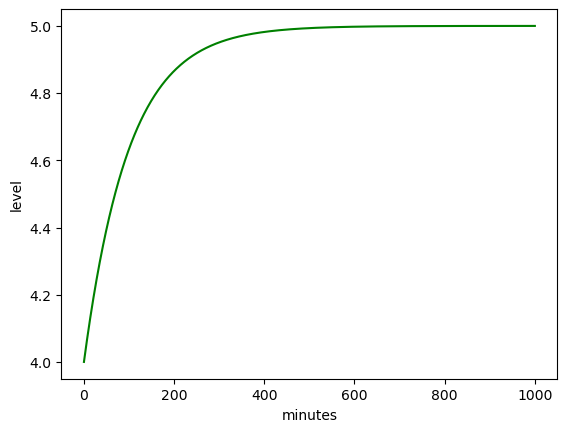

4.990178235540971

In [15]:
# EJERCICIO 1.b
# ==============================================================================

"""" definición del modelo"""

def fsys2(x,t,fin,c):
    dxdt=fin-c/S*x
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=1000
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
h0=4
#h0=np.linspace(0,8,9)
S=100
x0=h0*S
fin = 5
c=1
hmax=5.5

"""" dinámica del sistema"""

x = solveODE_euler(fsys2,x0,t,arg=(fin,c))
h=x/S

"""" representación gráfica"""

plt.plot(h,"g-",label='Simulation')
plt.xlabel("minutes")
plt.ylabel("level")

plt.show()

"""" nivel máximo"""

hdif_sim=list()
hdif_sim.append(h0)
for i in range(0,len(h)-1):
    hdif_sim.append(h[i+1]-h[i])

ser = pd.Series(data=hdif_sim, index=t)

tol=0.0001
h[np.min(np.where(ser<=0.0001))]


En este caso la presa nunca se desborda y alcanza una altura cada vez más cercana a 5 sin rebasarla. 

**(c)** Resolver analíticamente el modelo y comprobar que la repuesta a las preguntas anteriores dadas por la simulación coincide con la analítica. 

Las soluciones analíticas son las siguientes: 

**a)** Es un modelo constante $\displaystyle{\frac{dx}{dt} = fin-fout} $. 

La solución se obtiene integrando la ecuación diferencial de la siguiente forma: $$ \frac{dx}{dt} = fin-fout \longrightarrow dx=(fin-fout)dt \longrightarrow \int_{x_0}^{x(t)} dx=\int_{t_0}^{t}(fin-fout)dt, $$

siendo $t_0$ el instante inicial y $x_0=x(t_0)$ el estado del sistema en el instante inicial. La solucion de las integrales resulta: 

$$x(t)=x_0 + (fin-fout)(t-t_0).$$

En el ejercicio tomamos $t_0=0$ y $x_0 = 400$.

**b)** En este caso tenemos el modelo $\displaystyle{\frac{dx}{dt} = fin - \frac{c}{S} x} $. Siguiendo el procedimiento de solución de una ecuación lineal de este tipo (teoría), la solución es:  

$$x(t)=x^* + Ke^{- \frac{c}{S}t},$$

asumiendo $t_0=0$ y con $x^*=\frac{fin*S}{c}$. El paramétro $K$ se obtiene de igualar $x(0)=x_0$, que resulta $K=x_0-x^*%-$. 


## Ejercicio 2

Una población de bacterias sigue un crecimiento dado por un modelo logístico. Se pueden extraer los datos de esta [página web](https://mathinsight.org/bacteria_growth_logistic_model). Entonces: 

**(a)**  Modelar la evolución de la población de las bacterias siguiendo un patrón de crecimiento constante, exponencial y logístico. 

**(b)** Calibrar los parámetros del modelo en los tres casos anteriores.

**(c)** Validar el modelo, eligiendo el que mejor se ajuste a los datos.  

**(d)** Estudiar la capacidad de carga o el máximo número de bacterias a largo plazo. 

**(e)** Estudiar el modelo asumiendo diferentes unidades de incremento del tiempo. 

**(f)** Resolver analíticamente el modelo. 


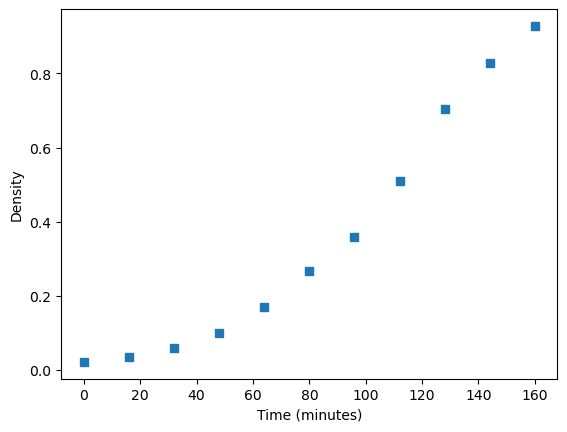

In [5]:
# DESCARGA Y VISUALIZACIÓN DE DATOS
# ==============================================================================

# LIBRERÍAS DE OPERACIONES
# ==============================================================================

import pandas as pd
import numpy as np

#from modsim import *

# LIBRERÍAS DE GRÁFICOS
# ==============================================================================
import matplotlib.pyplot as plt

#LIBRERÍAS PARA NO VERIFICAR CERTIFICADOS Y QUITAR WARNINGS
# ==============================================================================
import urllib.request
import ssl
import warnings
warnings.filterwarnings('ignore')

# Crear un contexto SSL que no verifique los certificados
context = ssl._create_unverified_context()

# Usar el contexto al abrir la URL
response = urllib.request.urlopen('https://mathinsight.org/bacteria_growth_logistic_model', context=context)
html_bact = response.read()

tables_bact = pd.read_html(html_bact,
                   header=0, 
                   index_col=0,
                   decimal='M')


table=tables_bact[0]

table.columns = ['time', 'density']
df=table.drop(columns='time')
df.index.names = ['minutes']

#alternativa2 si no lee

#minutes=[0,16,32,48,64,80,96,112,128,144,160]
#density=[0.022,0.036,0.060,0.101,0.169,0.266,0.360,0.510,0.704,0.827,0.928]

#df=pd.DataFrame(data=density, index= minutes)

plt.plot(df,"s",label='bacteria population')
plt.xlabel("Time (minutes)")
plt.ylabel("Density")

plt.show()


Estos son los datos de crecimiento de la densidad de bacterias. 

Vamos a realizar conjuntamente los tres primeros apartados: 

**(a)**  Modelar la evolución de la población de las bacterias siguiendo un patrón de crecimiento constante, exponencial y logístico. 

**(b)** Calibrar los parámetros del modelo en los tres casos anteriores.

**(c)** Validar el modelo, eligiendo el que mejor se ajuste a los datos. 

- Modelo de crecimiento constante

En primer lugar, ajustamos el parámetro de crecimiento del modelo según la diferencia entre la densidad final e inicial: 

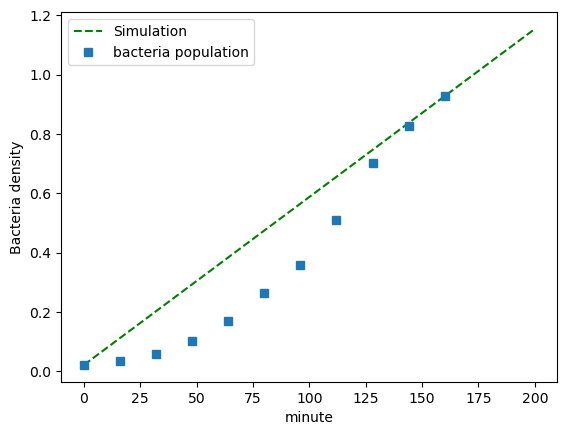

MAE: 0.11
RMSE: 0.14


In [7]:
"""" definición del modelo"""
def fsys1(x,t,a):
    dxdt=a
    return np.array([dxdt])

"""" definición del intervalo de tiempo"""
timestep = 1 
t0=0
tf=200
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
t1=df.index[0]
t2=df.index[-1]
d1=df.iloc[0][0]
d2=df.iloc[-1][0]
elapsed_time=t2-t1
total_growth=d2-d1

a=total_growth/elapsed_time
x0=d1

"""" dinámica del sistema"""

def solveODE_euler(f, x0, t,  arg=()):
    n = len(t)
    x = np.zeros(n)
    #x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

x = solveODE_euler(fsys1,x0,t,arg=(a,))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

""" Calcular el error cometido en el ajuste """
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.2f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.2f}")



Otra aproximación usando ajuste por mínimos cuadrados:

[0.0056625]
[0.0056625]
[0.0056625]
[0.0056625]
[0.00476299]
[0.00476299]
[0.00476299]


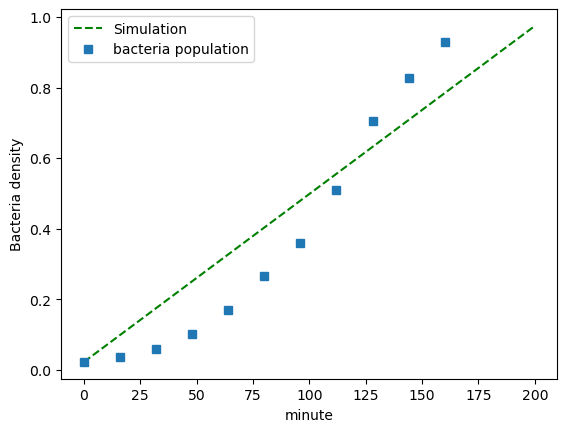

MAE: 0.10
RMSE: 0.11


In [9]:
# LIBRERÍAS DE OPERACIONES
# ==============================================================================

from scipy import integrate, optimize
from math import log
import math


"""data fit with the model"""

params=a
def error_func(params, data):
    print(params)
    sol = solveODE_euler(fsys1, x0, t, arg=(params,))
    errors = sol[df.index]-data.iloc[:,0]
    return errors

best_params, fit_details = optimize.leastsq(error_func, params, df)

a_opt = best_params

x = solveODE_euler(fsys1,x0,t,arg=(a_opt,))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

#Calcular el error cometido en el ajuste
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.2f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.2f}")


Como se puede observar, la aproximación del parámetro de crecimiento por mínimos cuadrado mejora tanto el MAE como el RMSE, por lo que la tomamos como el mejor ajuste con el modelo de crecimiento constante. 

- Crecimiento exponencial: 

En primer lugar, tomando un ajuste de los parámetros por ensayo y error: 

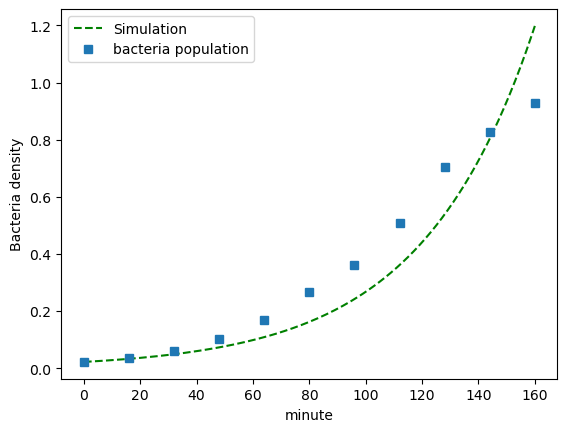

MAE: 0.08
RMSE: 0.12


In [5]:
"""" definición del modelo"""
def fsys2(x,t,a,b):
    dxdt=a*x-b*x
    return np.array([dxdt])

"""" definición del intervalo de tiempo"""
timestep = 1 
t0=0
tf=160
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
a = 33 / 1000
b = 7.7 / 1000
x0=df.iloc[0,0]

"""" dinámica del sistema"""


x = solveODE_euler(fsys2,x0,t,arg=(a,b))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
#plt.scatter(df.index,df.density,label='Real data')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

#Calcular el error cometido en el ajuste
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.2f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.2f}")


y ahora por un ajuste de mínimos cuadrado: 

[0.0077]
[0.0077]
[0.0077]
[0.0077]
[0.00818423]
[0.00818423]
[0.00819063]
[0.00819063]
[0.00819048]


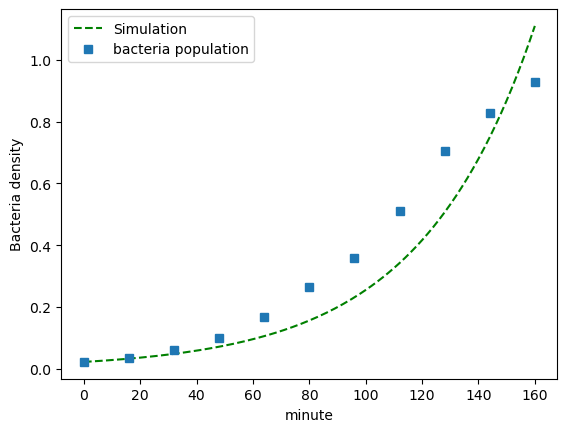

MAE: 0.09
RMSE: 0.11


In [6]:
"""data fit with the model"""

params=b
def error_func(params, data):
    print(params)
    sol = solveODE_euler(fsys2, x0, t, arg=(a,params))
    errors = sol[df.index]-data.iloc[:,0]
    return errors

best_params, fit_details = optimize.leastsq(error_func, params, df)

b_opt = best_params

x = solveODE_euler(fsys2,x0,t,arg=(a,b_opt))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

#Calcular el error cometido en el ajuste
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.2f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.2f}")


El ajuste por mínimos cuadrado empeora el MAE pero mejora el RMSE. No hay diferencias significativas entre ambos ajustes, pero ambos mejoran un poco el modelo con crecimiento constante. 

- modelo de crecimiento logístico: 

Ajustando los parámetros por ensayo y error

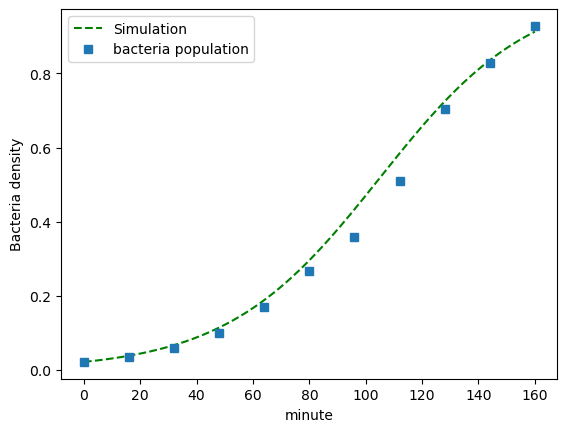

MAE: 0.0242
RMSE: 0.0347


In [7]:
"""" definición del modelo"""
def fsys3(x,t,a,b):
    dxdt=a*x-b*x**2
    return np.array([dxdt])

"""" definición del intervalo de tiempo"""
timestep = 1 
t0=0
tf=160
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
a = 37 / 1000
b = 36 / 1000
x0=df.iloc[0,0]

"""" dinámica del sistema"""


x = solveODE_euler(fsys3,x0,t,arg=(a,b))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

#Calcular el error cometido en el ajuste
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.4f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.4f}")



El ajuste a los datos mejora sustancialmente. Probamos a realizar una estimación de los parámetros por mínimos cuadrados:  

[0.037 0.036]
[0.037 0.036]
[0.037 0.036]
[0.037 0.036]
[0.037 0.036]
[0.0338561  0.02966139]
[0.0338561  0.02966139]
[0.0338561  0.02966139]
[0.03398295 0.0294593 ]
[0.03398295 0.0294593 ]
[0.03398295 0.0294593 ]
[0.03398162 0.02945915]
[0.03398162 0.02945915]
[0.03398162 0.02945915]
[0.03398164 0.0294592 ]


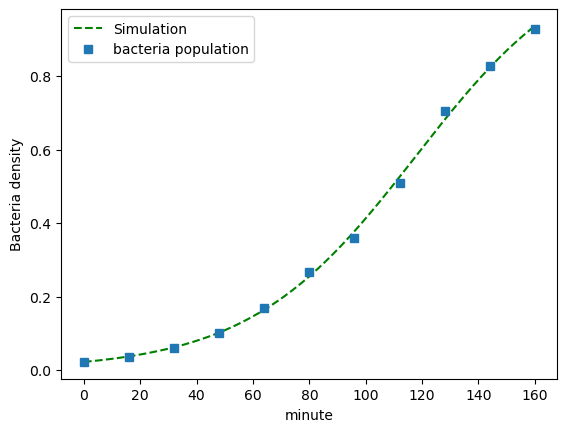

MAE: 0.0080
RMSE: 0.0109


In [8]:
params=(a,b)
def error_func(params, data):
    print(params)
    sol = solveODE_euler(fsys3, x0, t, arg=(params))
    errors = sol[df.index]-data.iloc[:,0]
    return errors

best_params, fit_details = optimize.leastsq(error_func, params, df)

a_opt, b_opt = best_params

x = solveODE_euler(fsys3,x0,t,arg=(a_opt,b_opt))
    
plt.plot(t,x,"g--",label='Simulation')
plt.plot(df,"s",label='bacteria population')
plt.xlabel("minute")
plt.ylabel("Bacteria density")
plt.legend()

plt.show()

#Calcular el error cometido en el ajuste
# MAE
mae = np.mean(np.abs(x[df.index]-df.iloc[:,0]))
print(f"MAE: {mae:.4f}")
# RMSE
rmse = np.sqrt(np.mean((x[df.index]-df.iloc[:,0])**2))
print(f"RMSE: {rmse:.4f}")



Mejora en ambos indicadores de bondad de ajuste. Este parece el mejor modelo. 

**(d)** Estudiar la capacidad de carga o el máximo número de bacterias a largo plazo. 

**(e)** Estudiar el modelo asumiendo diferentes unidades de incremento del tiempo. 


**(f)** Resolver analíticamente el modelo. 
